# 빈도 분석 예제와 연습
## 기본적인 영문 텍스트 전처리 작업
- 대문자의 소문자 변환
- 모든 문장부호 및 숫자 제거
- 소유격 's, 부정 n't, I'm, you're, you've 등 분리/제거
- 불용어 stop word 목록 제거
    - 길이 2 또는 3 이하 어휘 제거: 약자, a, an, in, on 등 제거
    - the, in, what 등 기능어/문법어, say, people 등 주제어가 될 가능성이 적다고 가정되는 고빈도 어휘(텍스트) 제거
- stemming: walked > walk 같이 어미 제거
- lemmatizing: am, are, ... > be와 같이 기본형으로 복원
> 항상 정답일까?? 좋은 방법은 최대한 안 건드리는 것일 수 있다.

## DF와 BCN와 비교해보기
- mining은 희미하다: 이건 이런 게 아닐까?부터 시작된다.
- 구어는 현재형이 많이 쓰인다.
- 오바마 연설문은 구어에 가까운 측면이 있다: 현재형 빈도
- 왜 i보다 we가 더 높을까?

## 고빈도 어휘 관찰
- 밑줄 친 어휘: 1인칭 i? 복수형 we?
- we've/we're, i'm/i've
    - we가 다양히 쓰이면서도 고빈도라는 것을 알아낼 수 있다.
- 너무 전처리를 많이 하면 의심할 여지조차 없을 수 있다.
- 독학의 위험성: 독학이 불가피한 분야지만 주의해야 한다.

## word cloud

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Python314\python.exe -m pip install --upgrade pip


시험 볼 때 외우지는 마라.
분석 코드가 아니라 가공 코드에 주안을 두자!

In [2]:
import sys
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
print(sys.executable)

c:\Users\yunji\AppData\Local\Programs\Python\Python311\python.exe


(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

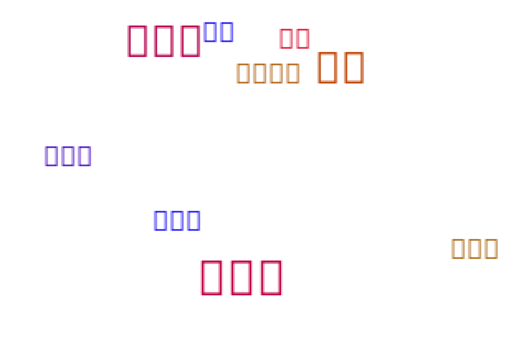

In [4]:
import wordcloud
wc = wordcloud.WordCloud(background_color='white',
                            width=300, height=200,
                            max_words=200, max_font_size=30,
                            colormap='brg')

text = """
이형승 최윤지 사랑 이형승 최윤지 이형승 이형승 이형승
사랑 사랑 사랑 최윤지 최윤지
워드 클라우드 파이썬 데이터 분석 시각화
"""

# 2. generate() 메서드를 호출하여 워드 클라우드 계산
# 이 단계에서 텍스트 분석 및 레이아웃 생성이 이루어집니다.
wc.generate(text)

import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')

## 참조 코퍼스와 비교
- 문장 길이가 길다: 쉼표/아/고/.
- 격식: ㅂ니다/우리
- 북한
- 을/JKO: 대통령 시정 연설문의 목적은? 설득!

## Zipf 법칙과 LNRE 모형을 통해 다시 보기
테크닉만으로는 어렵다. 관련 분야의 지식이 필요한 까닭이 있다.

연습문제는 집에서 하쟈! 폰트는 따로 봐라.


## 연습문제 1

In [59]:
import re
obama = open('./07_data/07_Obama.txt', 'r').read().lower()
re.sub('[(].+?[)]', '', obama)
words = [w for word in obama.split()
            if (w := re.sub('^\W+|\W+$', '', word))]

In [ ]:
words = [w for word in re.sub('[(].+?[)]', '', open('./07_data/07_Obama.txt', 'r')
                                .read().lower()).split()
            if (w := re.sub('^\W+|\W+$', '', word))]

## 연습문제 2

In [74]:
from collections import Counter
import pandas as pd

DF = pd.DataFrame(pd.Series(Counter(words)))
DF.columns = ['Freq']; 
DF.sort_values('Freq', ascending=False, inplace=True)
DF.head(15)

,Freq
to,278
the,265
and,245
that,196
a,141
of,139
we,129
i,126
in,123
for,93


In [75]:
DF.Freq.sum()

np.int64(7468)

## 연습문제 3

(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

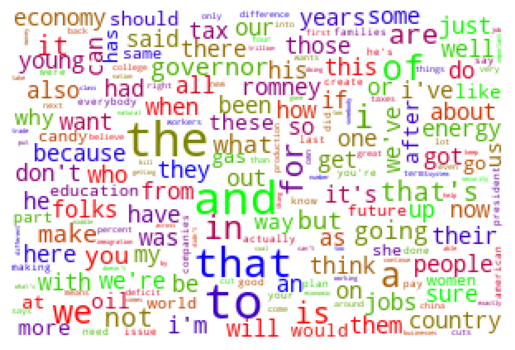

In [78]:
import wordcloud
wc = wordcloud.WordCloud(background_color='white',
                            width=300, height=200,
                            max_words=200, max_font_size=30,
                            colormap='brg').generate_from_frequencies(DF.Freq)

import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')

## 예제 파일: 07_PresidentialSpeech.tag
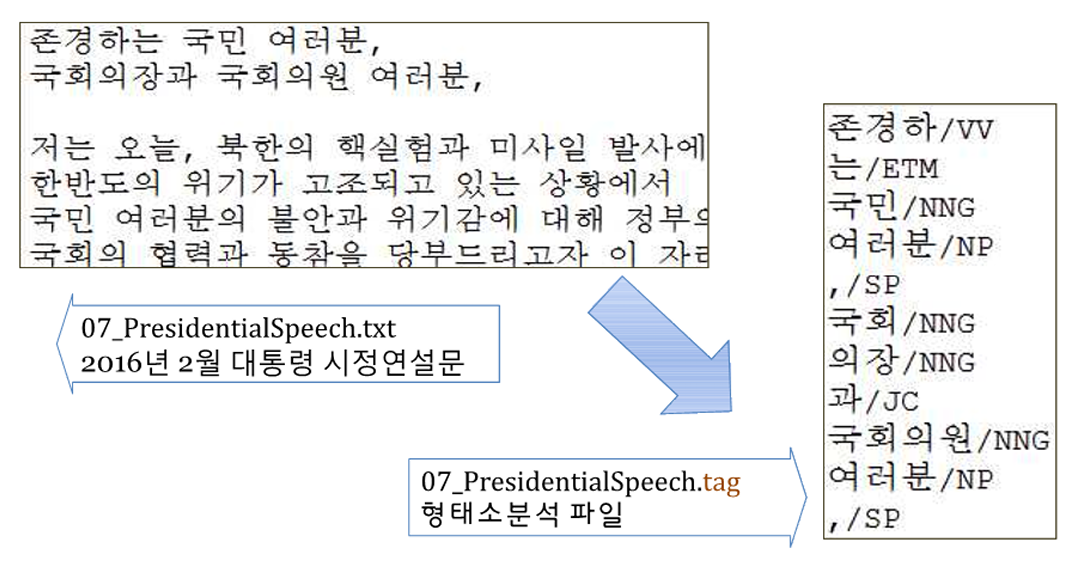

## 연습문제 4

In [130]:
tag_split = open('./07_data/07_PresidentialSpeech.tag', 'r', encoding='utf-8').read().split('\n')
DF = pd.DataFrame(pd.Series(
        Counter([word for tag in ['NNP', 'NNG', 'VV', 'VA']
        for word in re.findall('(\w+?)/' + tag, ' '.join(tag_split))])))
DF.columns = ['Freq']; 
# DF.sort_values(by=['Freq', DF.index], ascending=[False, True], inplace=True)
# DF.sort_index(ascending=True, inplace=True)
DF.sort_values('Freq', ascending=False, inplace=True)
DF.head(20)

,Freq
북한,54
국민,29
위하,23
핵,21
도발,19
정부,19
있,18
하,15
사회,14
되,13


## 연습문제 5

In [ ]:
# from matplotlib import font_manager as fm
# import matplotlib
# fm.findSystemFonts()
# font_location = 'C:\\Windows\\Fonts\\malgun.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)
# # rc('font', family=font_name)

(np.float64(-0.5), np.float64(299.5), np.float64(199.5), np.float64(-0.5))

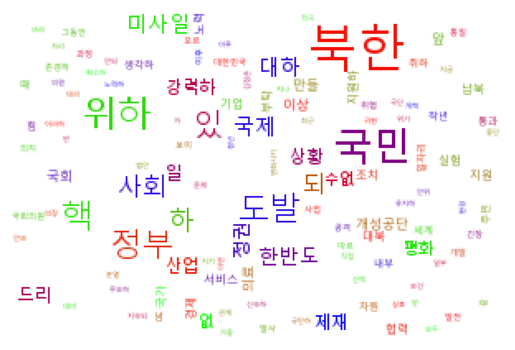

In [160]:
import wordcloud
wc = wordcloud.WordCloud(background_color='white',
                            font_path='C:/Windows/Fonts/malgun.ttf',
                            width=300, height=200,
                            max_words=200, max_font_size=30,
                            colormap='brg').generate_from_frequencies(DF.Freq)

import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')